# Quick Start Tutorial

This notebook shows an example Exploratory Data Analysis utilizing data-describe.

Note: Part of this notebook uses optional dependencies for text analysis. To install these dependencies, run `pip install data-describe[nlp]`

In [1]:
import data_describe as dd

## Data
This tutorial uses toy datasets from sklearn.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
dat = load_boston()
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['price'] = dat['target']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Overview

[Column Descriptions](https://scikit-learn.org/stable/datasets/index.html#boston-dataset):

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per \$10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in \$1000’s

In [5]:
df.shape

(506, 14)

First we inspect some of the overall statistics about the data. Some examples of interesting things to note:
- 93% of `CHAS` are the same value, zero
- `ZN` also has a high amount of zeros
- The mean of `TAX` is significantly higher than the median, suggesting this is right-skewed

In [6]:
dd.data_summary(df)

,Info
Rows,506
Columns,14
Size in Memory,55.5 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
CRIM,float64,0,0,0.0063,0.26,88.98,3.61,8.59,504,2
ZN,float64,0,0,0,0,100,11.36,23.30,26,372
INDUS,float64,0,0,0.46,9.69,27.74,11.14,6.85,76,132
CHAS,float64,0,0,0,0,1,0.069,0.25,2,471
NOX,float64,0,0,0.39,0.54,0.87,0.55,0.12,81,23
RM,float64,0,0,3.56,6.21,8.78,6.28,0.70,446,3
AGE,float64,0,0,2.90,77.50,100,68.57,28.12,356,43
DIS,float64,0,0,1.13,3.21,12.13,3.80,2.10,412,5
RAD,float64,0,0,1,5,24,9.55,8.70,9,132
TAX,float64,0,0,187,330,711,408.24,168.37,66,132


None

data-describe Summary Widget

We can also look at a visual representation of the data as a heatmap:

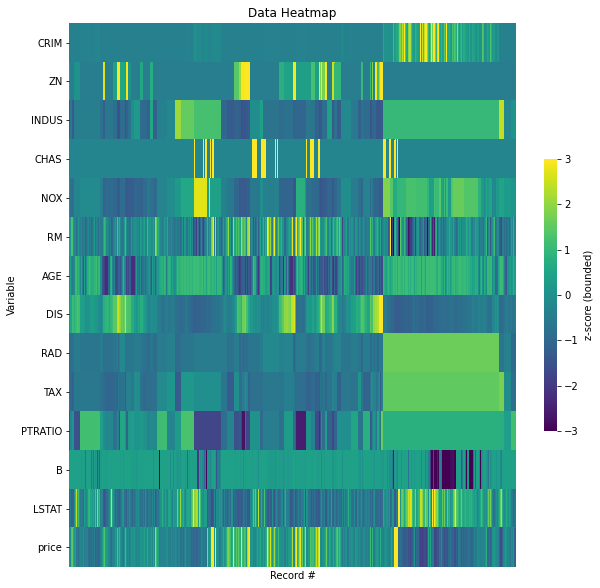

Heatmap Widget showing standardized values.

In [7]:
dd.data_heatmap(df)

There are some sections of the data which have exactly the same values for some columns. For example, `RAD` = 1.661245 between record number 356 ~ 487. Similar patterns appear for `INDUS` and `TAX`. Is this a sorting issue or is there something else going on? Some additional investigation into data collection may answer these questions.

We can also look at the correlations:

<AxesSubplot:title={'center':'Correlation Matrix'}>

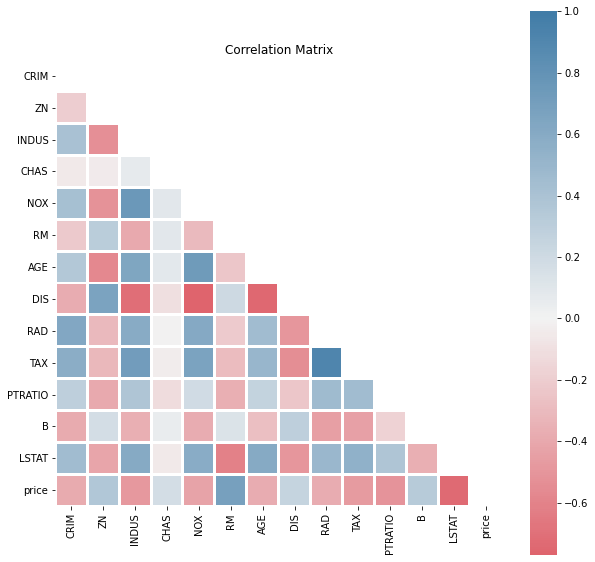

In [8]:
dd.correlation_matrix(df)

Features like `AGE` and `DIS` appear to be inversely correlated. `CHAS` doesn't appear to have strong correlation with any other feature.

It might also help to re-order the features for comparisons using the `cluster` argument.

<AxesSubplot:title={'center':'Correlation Matrix'}>

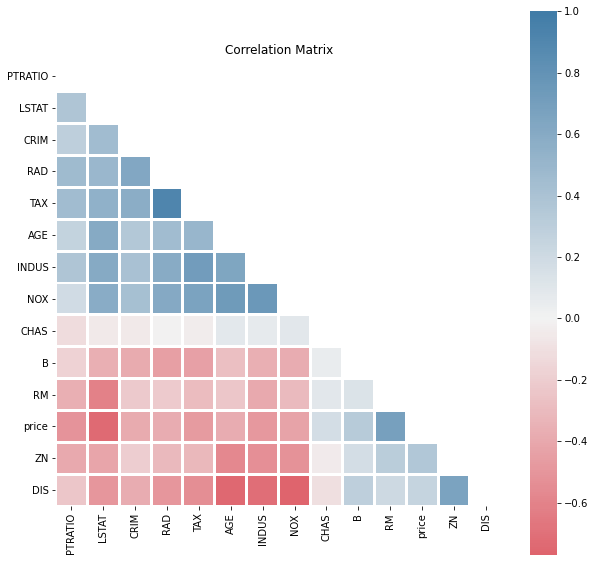

In [9]:
dd.correlation_matrix(df, cluster=True)

From this plot we can observe there are are two groups of inversely related features: `PTRATIO` to `NOX` and `B` to `DIS`.

## Data Inspection
We can also do some more detailed inspection of individual features. 

We can show histograms and violin plots of each numeric feature using the `dd.distribution` function.

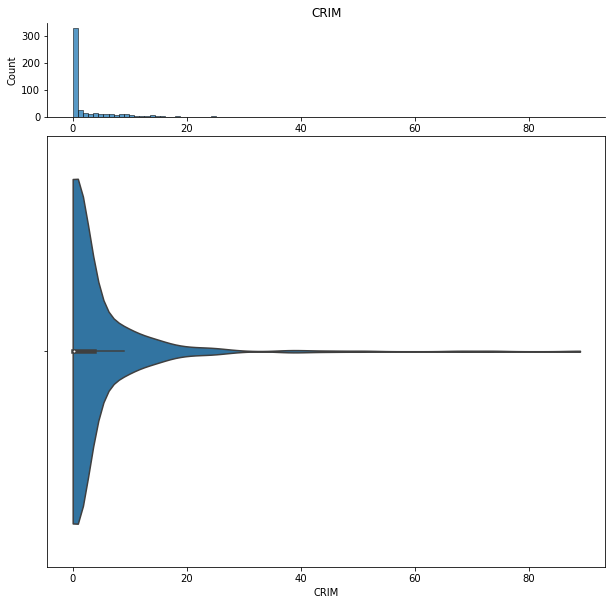

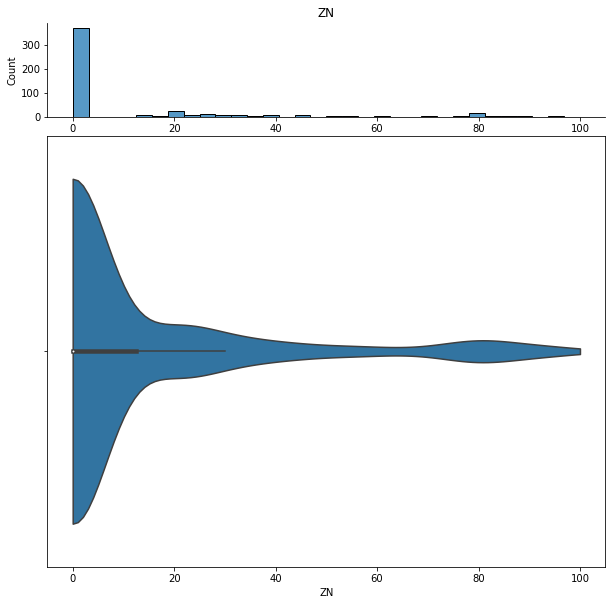

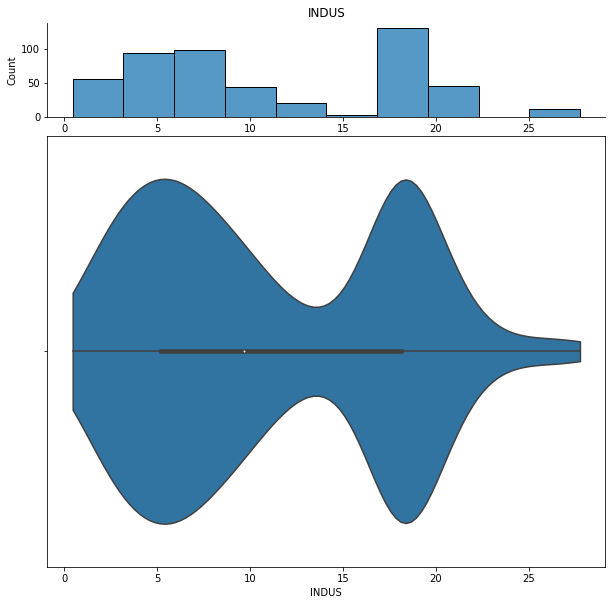

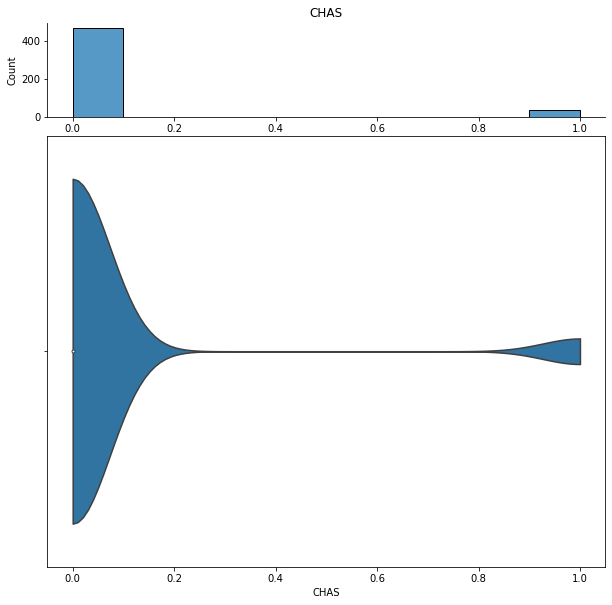

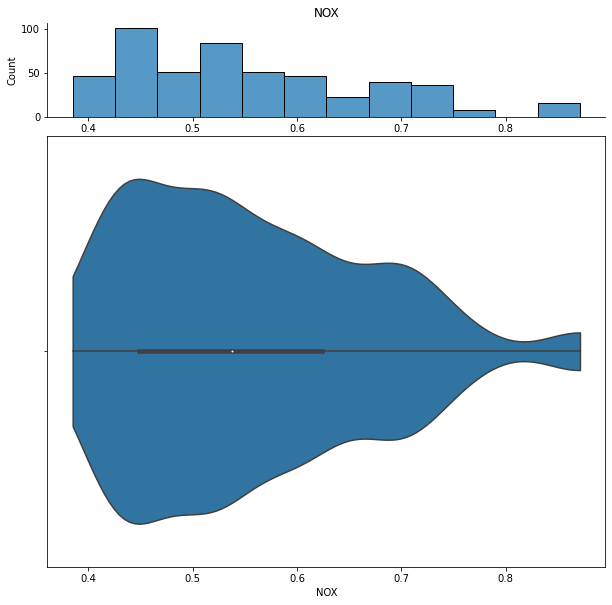

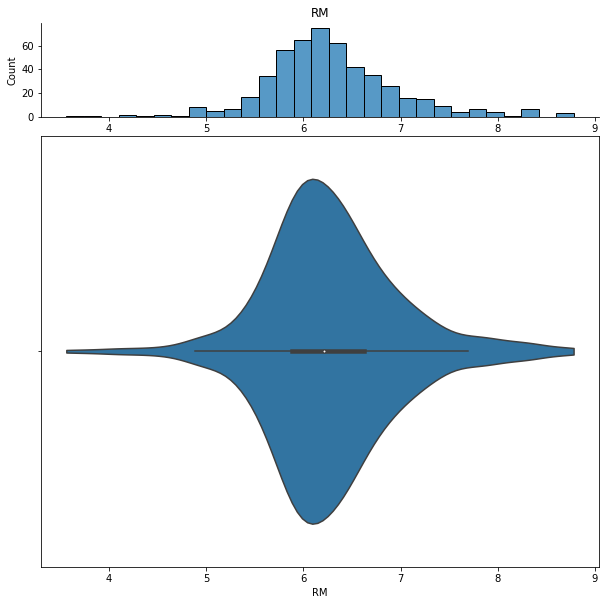

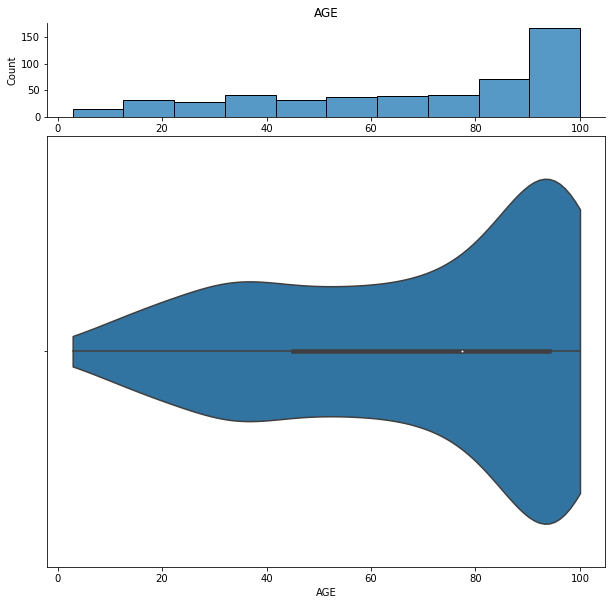

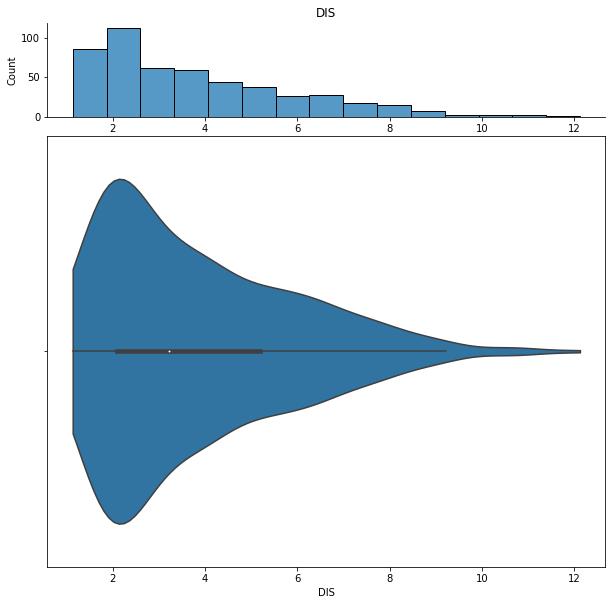

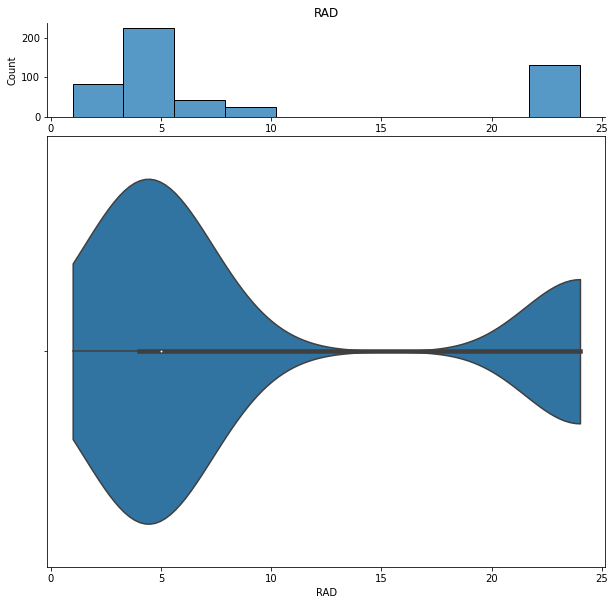

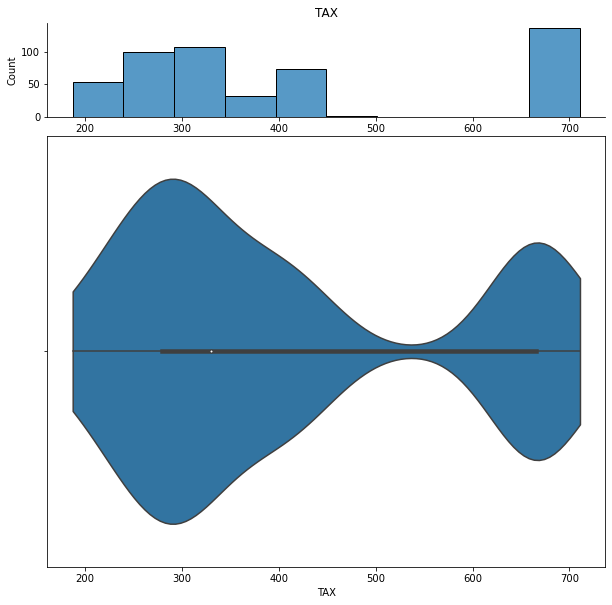

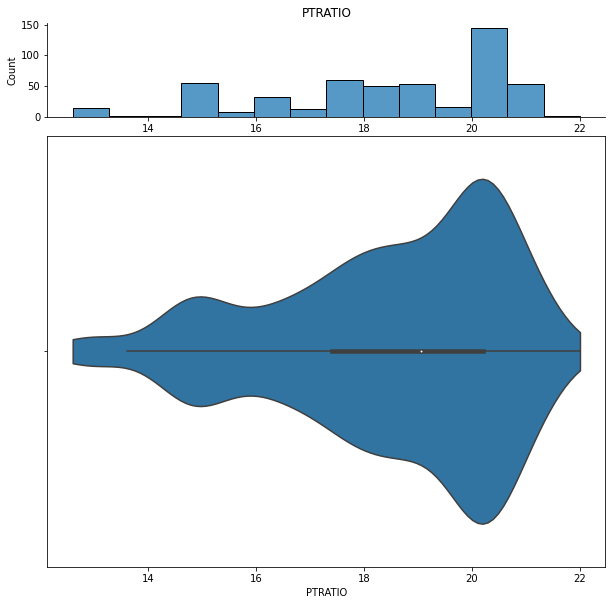

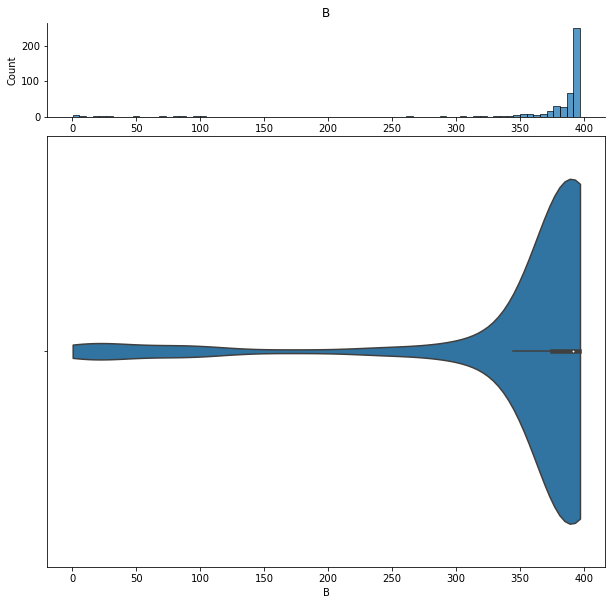

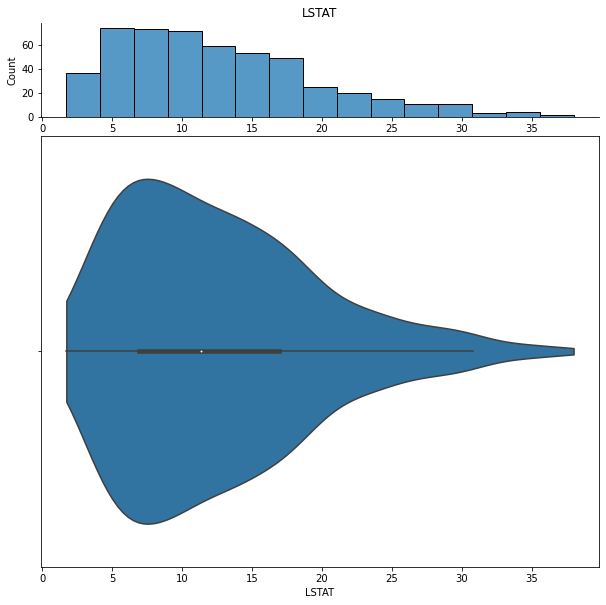

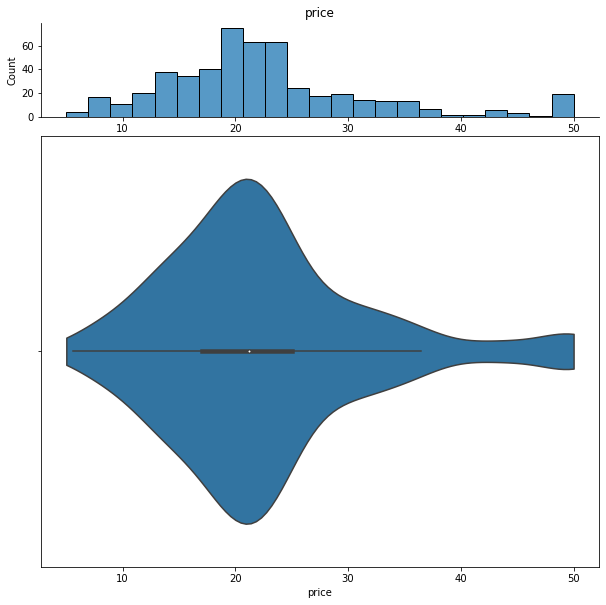

In [10]:
from IPython.display import display
# display is used to show plots from inside a loop
for col in df.columns:
    display(dd.distribution(df, plot_all=True).plot_distribution(col))

We can also look at bivariate distributions using scatter plots. In addition to plotting all pairs in a scatterplot matrix, we can also specify a filter for certain scatterplot diagnostic features.

data-describe Scatter Plot Widget

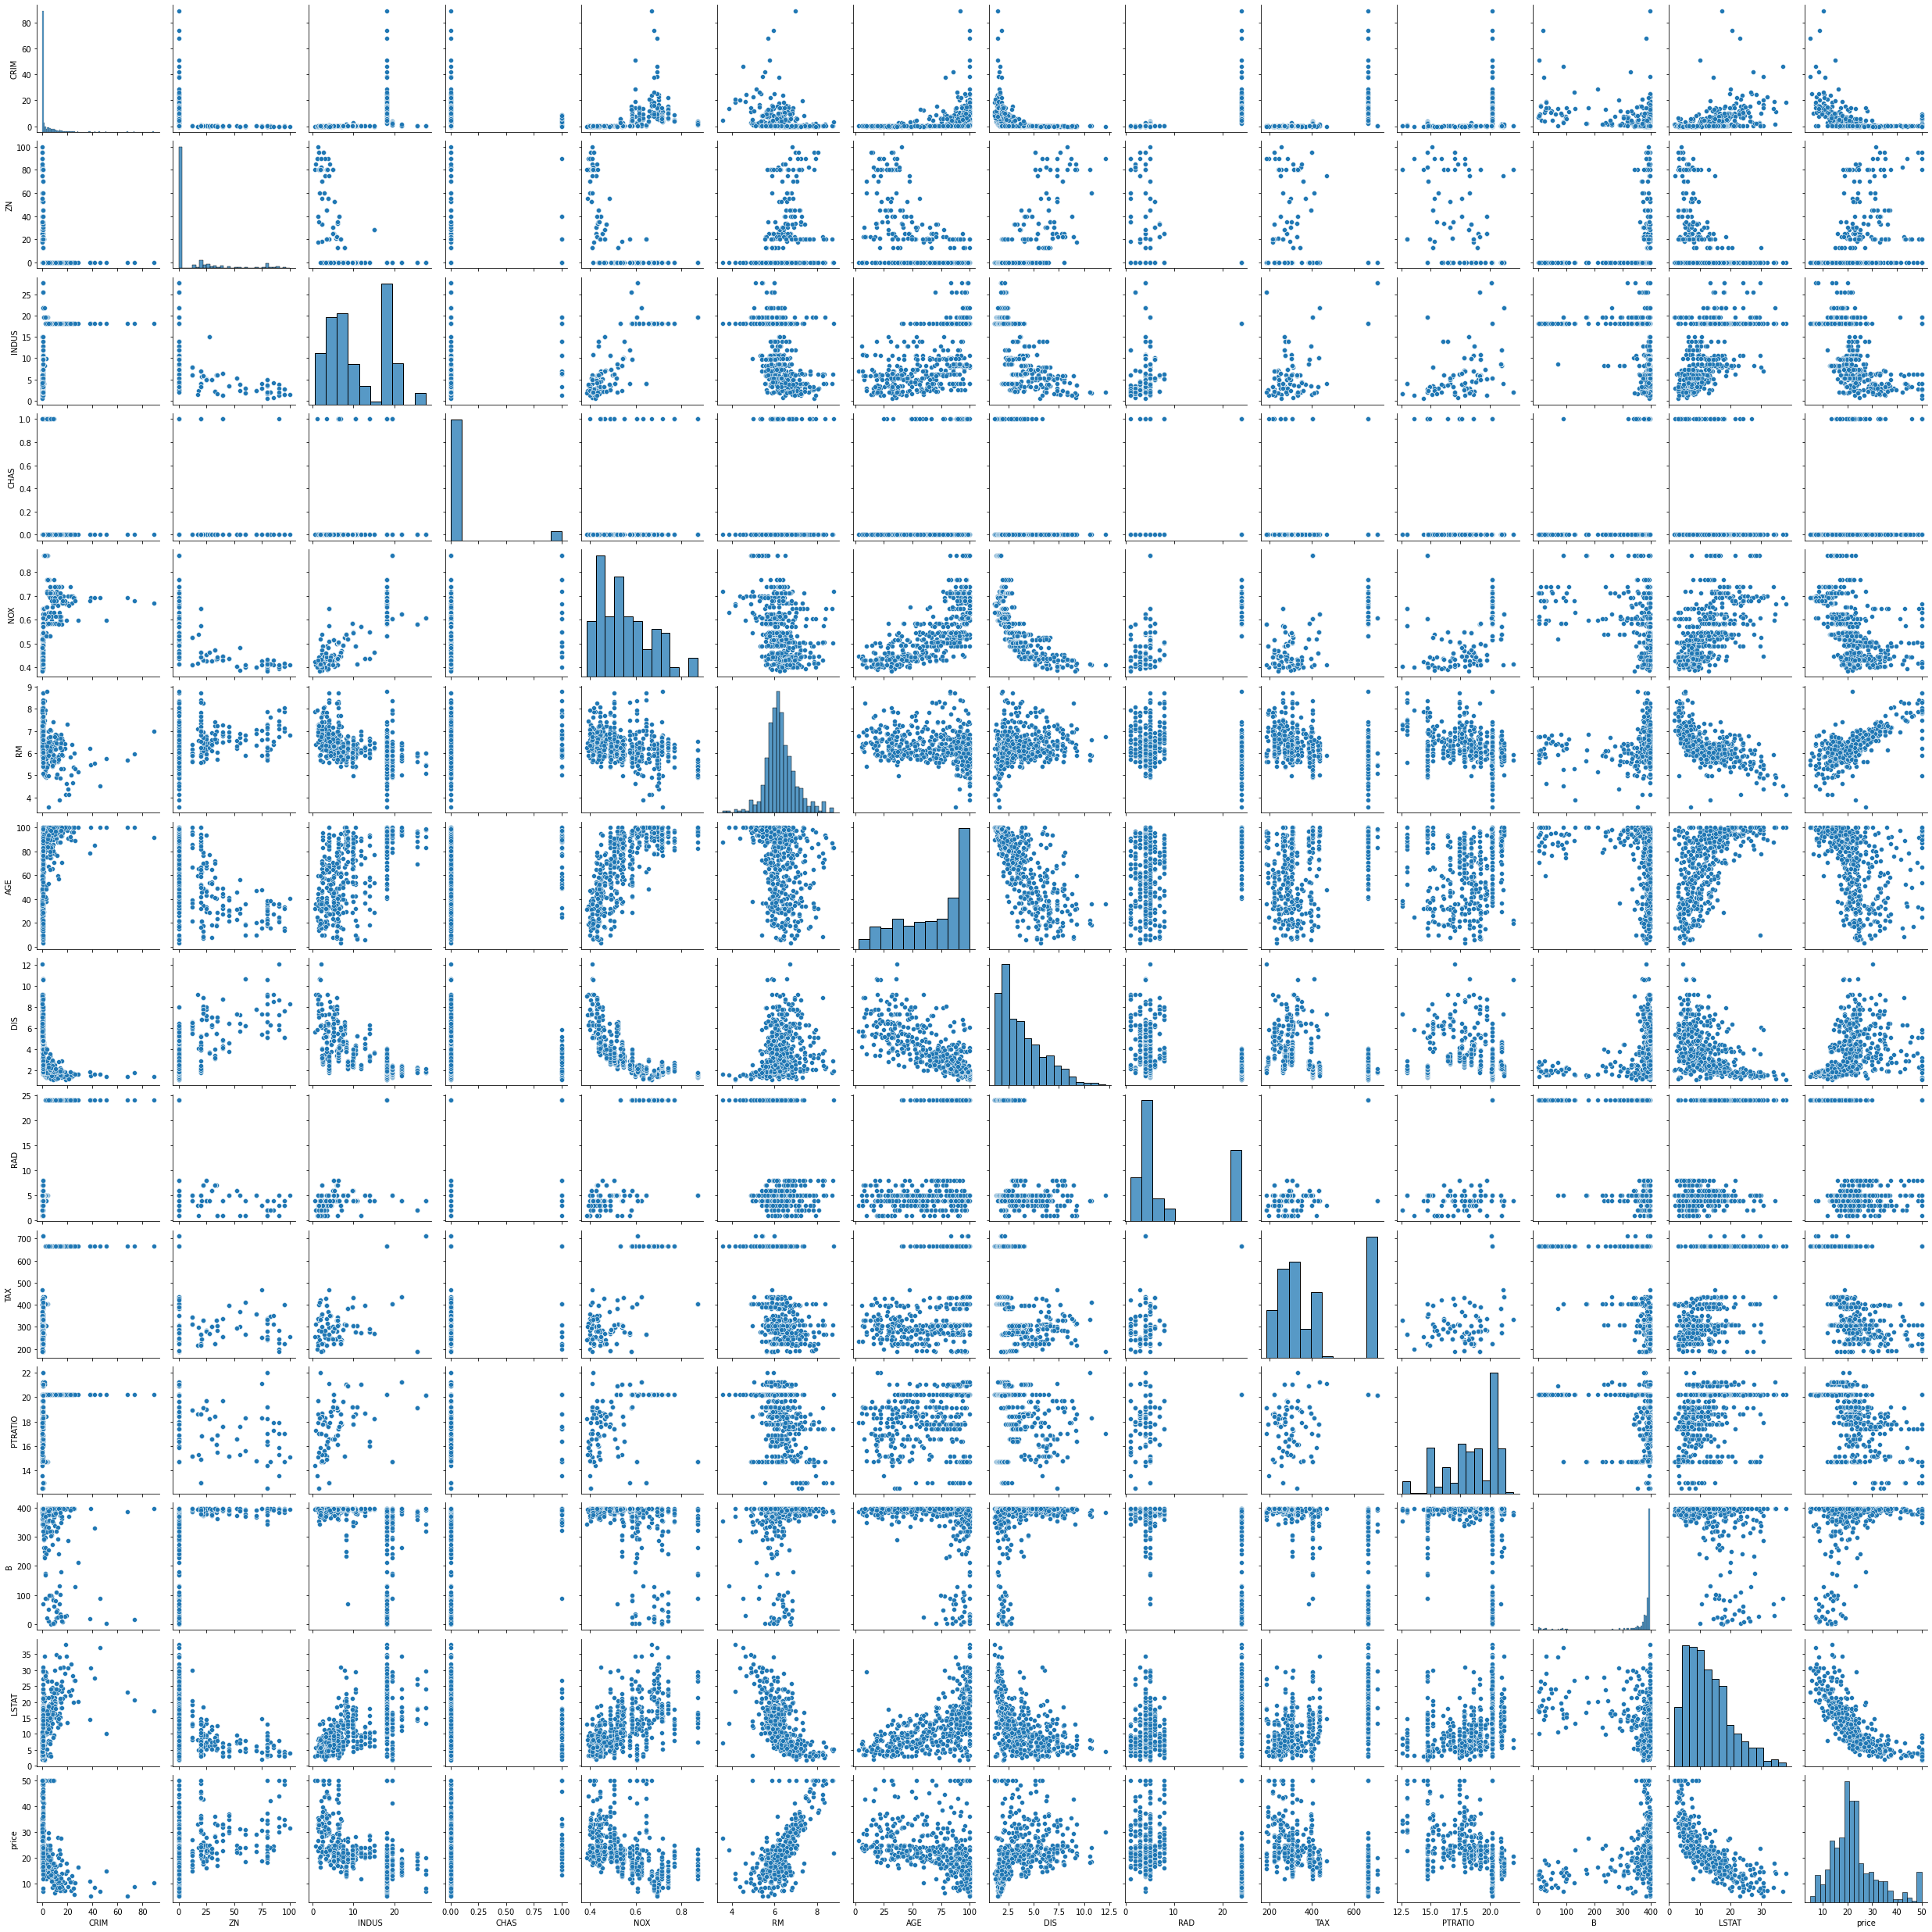

In [11]:
dd.scatter_plots(df, plot_mode='matrix')

data-describe Scatter Plot Widget

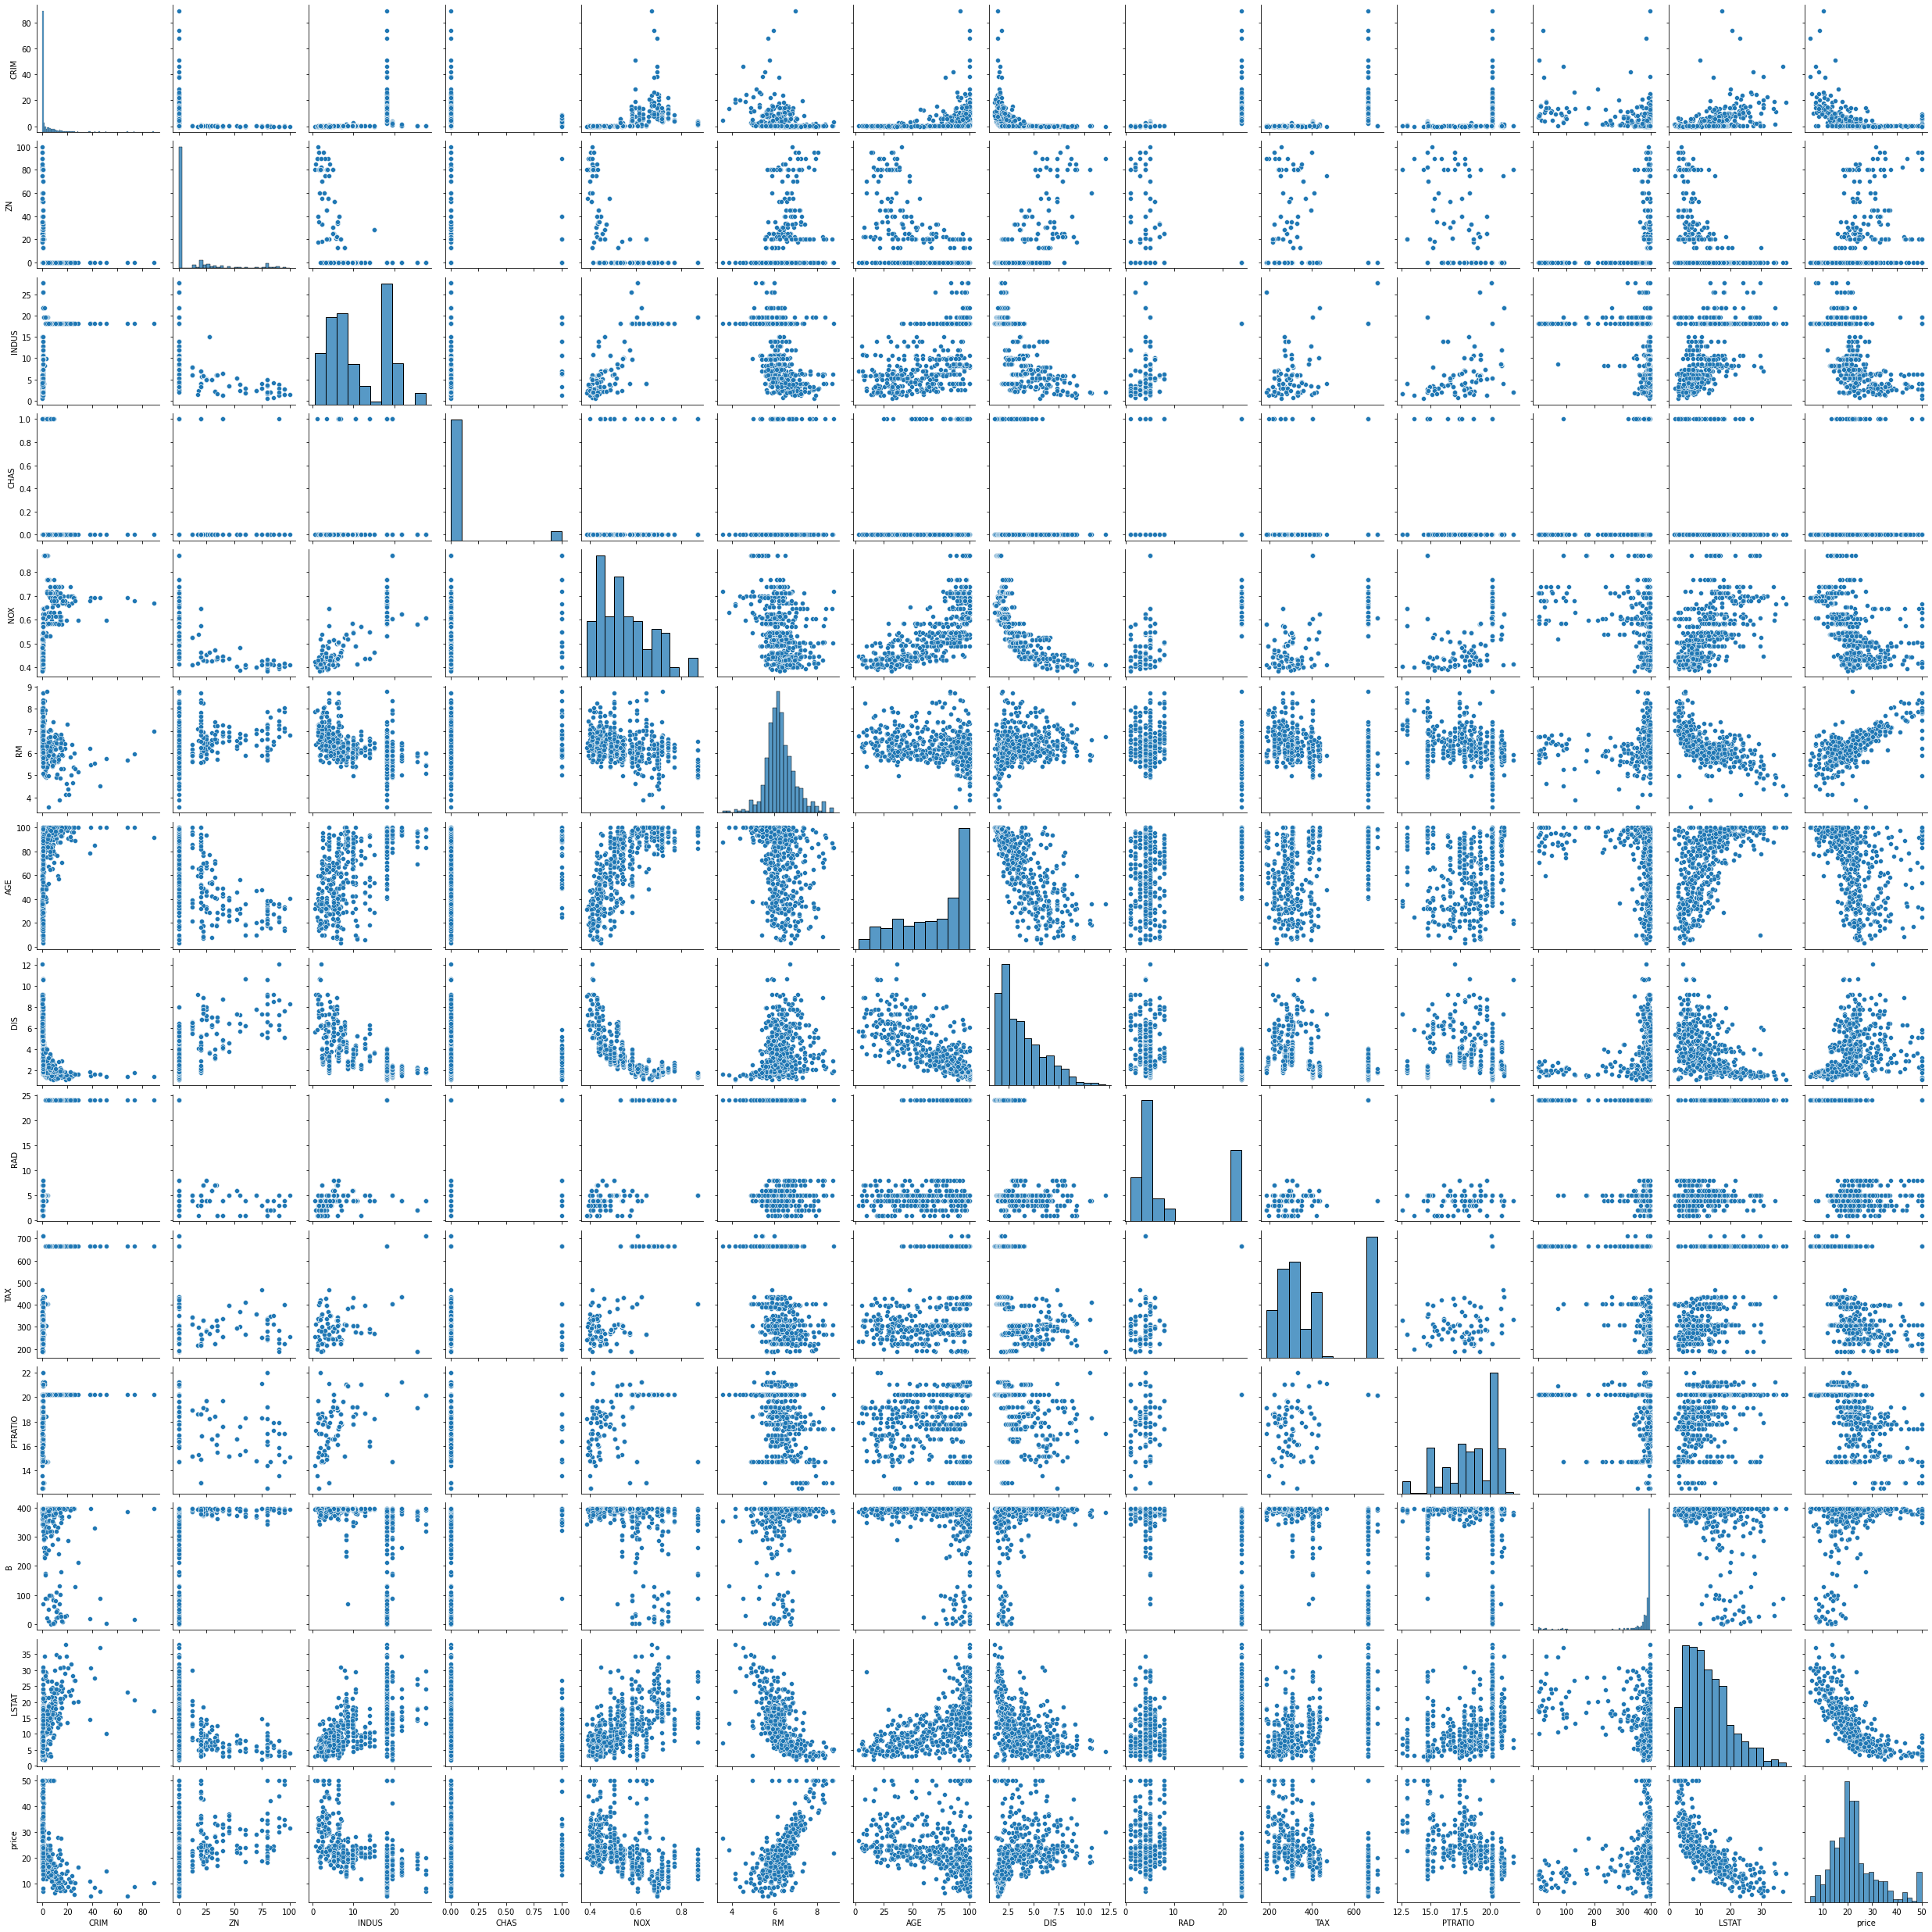

In [12]:
dd.scatter_plots(df, threshold={'Outlier': 0.9})

## Advanced Analysis
In addition to general plots, we can also use some advanced analyses as shown below.

### Cluster Analysis
What segments or groups are present in the data?

<AxesSubplot:title={'center':'kmeans Cluster'}, xlabel='Component 1 (47.0% variance explained)', ylabel='Component 2 (12.0% variance explained)'>

Cluster Widget using kmeans

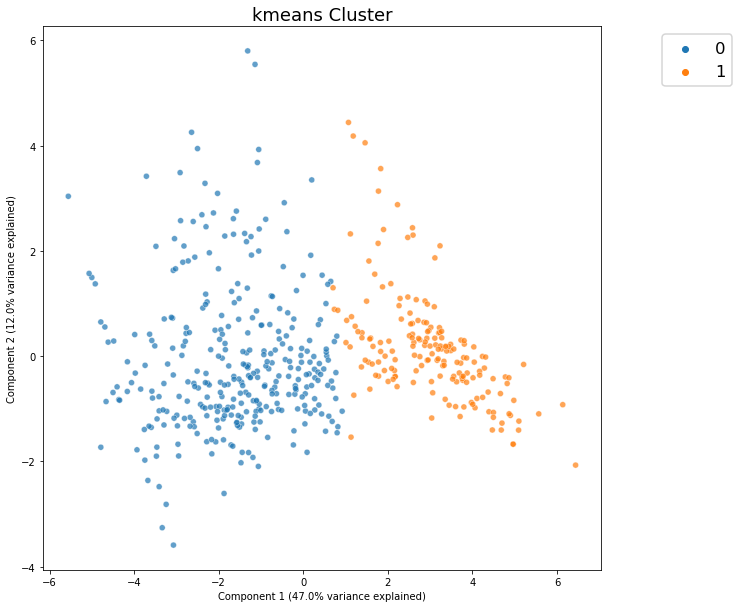

In [13]:
dd.cluster(df)

From this plot, we see that there does not appear to be strongly distinct clusters in the data.

### Feature Importance

Which features are most predictive of price? We use Random Forest as a baseline model to test for importance.

In [14]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'Feature Importance')

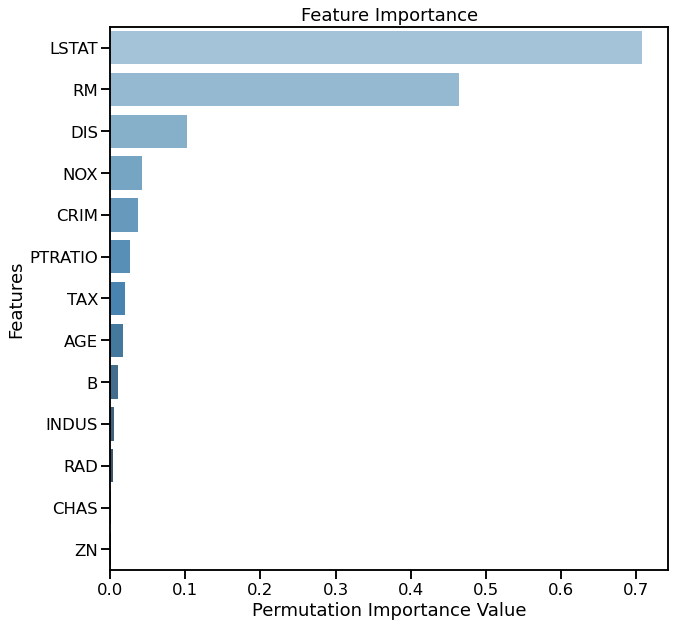

In [15]:
dd.importance(df, 'price', estimator=RandomForestRegressor(random_state=42))

It appears that `LSTAT` and `RM` are most important for predicting price.

### Topic Modeling
Since the Boston housing data set does not contain textual features, the 20 newsgroups text dataset is used to demonstrate the **Topic Modeling** widget.

In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
dat = fetch_20newsgroups(subset='test')
df2 = pd.DataFrame({'text': dat['data']})
df2 = df2.sample(150)

In [18]:
df2.head()

,text
3438,From: jtsilla@damon.ccs.northeastern.edu (Jame...
126,From: V2110A@VM.TEMPLE.EDU (Richard Hoenes)\nS...
5415,Distribution: world\nFrom: armani@edgeway.wims...
4553,From: stu1016@discover.wright.edu (Chris Thomp...
7182,From: kyle@wam.umd.edu (Kyle Xavier Hourihan)\...


Text preprocessing can be applied before topic modeling to improve accuracy.

In [19]:
from data_describe.text.text_preprocessing import preprocess_texts, bag_of_words_to_docs
processed = preprocess_texts(df2['text'])
text = bag_of_words_to_docs(processed)

In [20]:
from data_describe.text.topic_modeling import topic_model 

In [21]:
lda_model = topic_model(text, num_topics=3)
lda_model

,Topic 1,Topic 1 Coefficient Value,Topic 2,Topic 2 Coefficient Value,Topic 3,Topic 3 Coefficient Value
Term 1,government,0.021,time,0.026,could,0.028
Term 2,way,0.020,well,0.022,anyone,0.026
Term 3,world,0.020,use,0.019,well,0.021
Term 4,could,0.019,see,0.017,said,0.019
Term 5,said,0.018,ca,0.016,used,0.018
Term 6,much,0.018,may,0.016,work,0.017
Term 7,etc,0.017,really,0.015,go,0.017
Term 8,problem,0.016,said,0.015,ca,0.017
Term 9,two,0.016,way,0.015,made,0.015
Term 10,make,0.016,many,0.014,things,0.014
